In [3]:
import pandas as pd
import json

# Define a list of file paths to the JSON data
json_file_paths = [
    'Radar Samples - Original.table.json',
    'Radar Samples - Squared.table.json',
    'Radar Samples - Db.table.json',
    'Radar Samples - Normalized.table.json'
]

dataframes = []

for json_file_path in json_file_paths:
    # Load the JSON data from the file
    with open(json_file_path, 'r') as json_file:
        json_data = json.load(json_file)

    data = json_data.get('data', [])
    columns = json_data.get('columns', [])

    df = pd.DataFrame(data, columns=columns)

    dataframes.append(df)


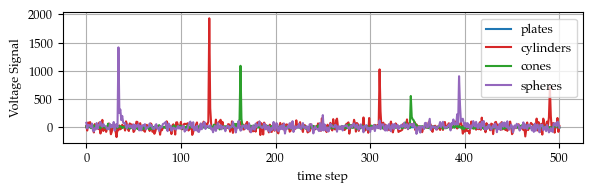

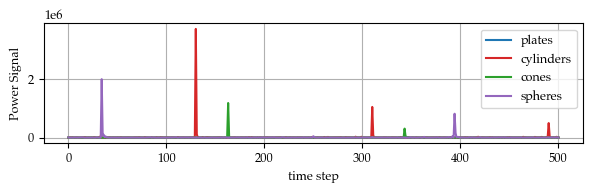

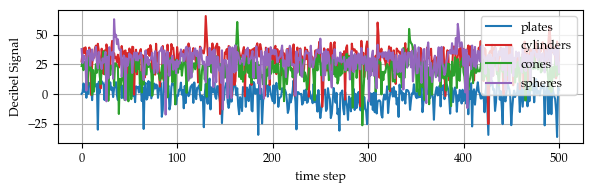

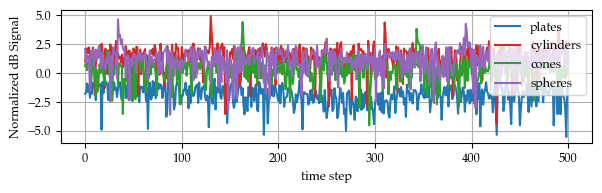

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino']
plt.rcParams['font.size'] = 9

def plot_data_by_class(data, title, y_acis):
    #plt.figure(figsize=(3, 3))
    plt.figure(figsize=(6, 2))

    # Get unique class names from the 'Class' column
    unique_classes = data['Class'].unique()

    # Retrieve the 'tab10' palette colors
    tab10_colors = sns.color_palette('tab10')

    # Customize the color order here if needed, for example:
    tab10_colors[1], tab10_colors[3] = tab10_colors[3], tab10_colors[1]
    tab10_colors[4], tab10_colors[3] = tab10_colors[3], tab10_colors[4]

    for i, class_name in enumerate(unique_classes):
        # Replace 'circular_plates' with 'plates' in class names
        class_name_display = class_name.replace('circular_plates', 'plates')

        class_data = data[data['Class'] == class_name]
        # Apply the customized color for each class
        plt.plot(class_data['Time_step'], class_data['Sample'], label=class_name_display, color=tab10_colors[i])

    #plt.title(title)
    plt.xlabel('time step')
    plt.ylabel(y_acis)
    #plt.legend()
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f"/Users/oscarb/Downloads/{title}_long.pdf", format='pdf')
    
    plt.show()


plot_data_by_class(dataframes[0], 'Voltage Time Series', 'Voltage Signal')
plot_data_by_class(dataframes[1], 'Power Time Series', 'Power Signal')
plot_data_by_class(dataframes[2], 'DB Power Time Series', 'Decibel Signal')
plot_data_by_class(dataframes[3], 'Normalized dB Time Series', 'Normalized dB Signal')


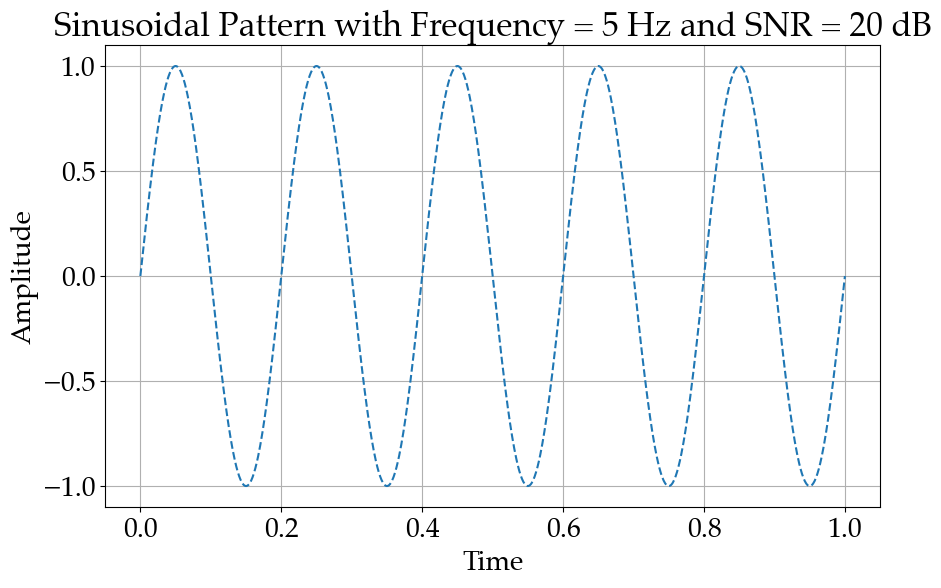

In [16]:


def plot_sinusoidal_pattern(freq, SNR):
    # Zeitachse definieren
    t = np.linspace(0, 1, 1000, endpoint=True)
    # Sinussignal generieren
    signal = np.sin(2 * np.pi * freq * t)
    
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(t, signal, label='Original Signal', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Sinusoidal Pattern with Frequency = {freq} Hz and SNR = {SNR} dB')
    
    plt.grid(True)
    plt.show()

# Beispiel: Frequenz = 5 Hz, SNR = 20 dB
plot_sinusoidal_pattern(5, 20)


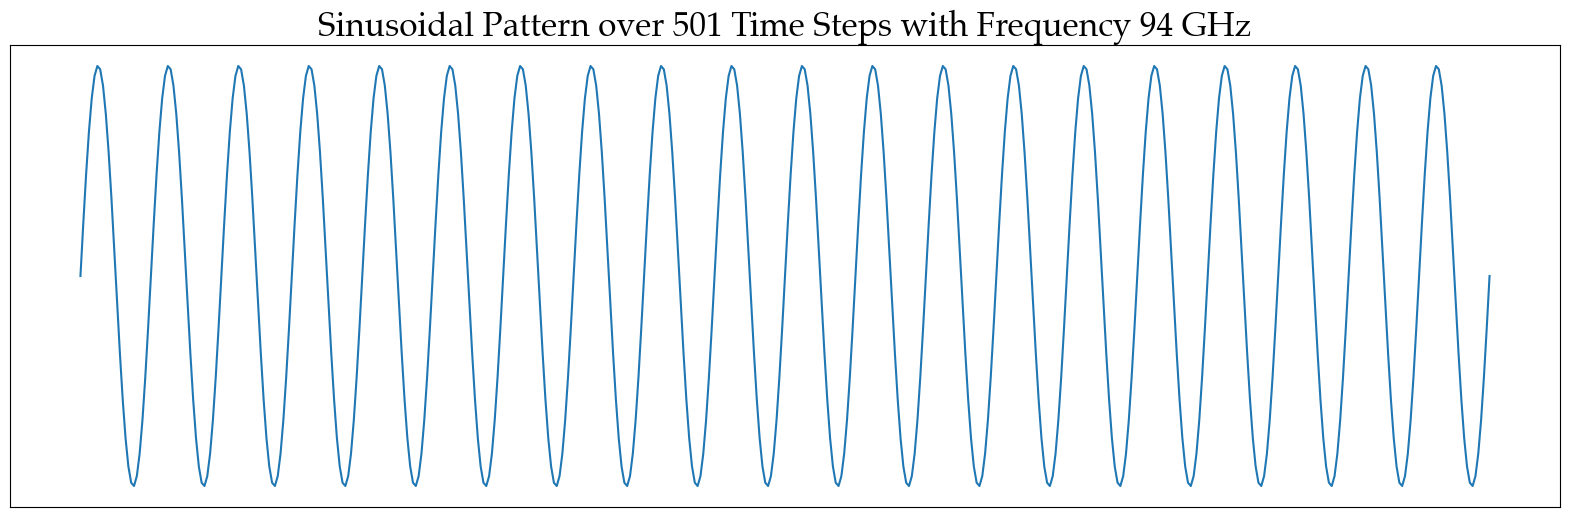

In [25]:

# Parameters
time_steps = 501
frequency = 94e9  # 94 GHz

# Time array definition
time = np.linspace(0, 1, time_steps)  # Assuming the total time span is 1 second for simplicity

# Sinusoidal pattern
signal = np.sin(2 * np.pi * 20 * time)
# Plotting
plt.figure(figsize=(20, 6))
plt.plot(time, signal)  # Corrected to use time as x-coordinates
plt.title('Sinusoidal Pattern over 501 Time Steps with Frequency 94 GHz')

plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.show()
